# Predicción de compras realizadas

### Objetivo

En el siguiente proyecto trabajaremos en torno a desarrollo de nuestro primer objetivo del problema de analitica al cual nos enfrentamos, este es el de: *Elaborar un modelo de regresión para predecir cuántas compras realizará un cliente por medio del catálogo, página web y tienda física* Para esto, implementaremos un algoritmo de regresion lineal, el cual es el algoritmo de machine learning supervizado que mas se adapta al problema del objetivo actual.  


Para el desarrollo primero importaremos las librerias que implementaremos junto con el set de datos que se utilizara
 

In [2]:
#Librerías de interés.
import pandas as pd                  #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt      #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns                #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                   #Importamos la librería numpy para manipular arreglos. 


from sklearn.model_selection import train_test_split #Útil para dividir los conjuntos de datos. 
from sklearn.preprocessing import MinMaxScaler       #Útil para escalar los atributos de entrada.
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from copy import deepcopy                            #Permite hacer copias profundas. 

In [3]:
df = pd.read_csv("../../datos/clean_marketing_campaing.csv")

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426.0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11.0,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,...,5,0,0,0,0,0,0,3,11,0


Como podemos observar en las anteriores celdas de codigo, importamos el set de datos que vamos a utilizar ya depurado, sin datos duplicados, con los outliers corregidos o tratados y los datos faltantes solucionados. Ya con esto podremos empezar a desarrollar nuestro respectivo modelo

### Modelo: **Regresion lineal**

Para soluccionar el objetivo tendremos que implementar 3 modelos diferentes, uno por cada tipo de medio de compra, donde nuestra variable objetivo o target sera el medio de compra y nuestras variables predictoras seran las que mejor comportamiento ofrezca a la hora de la predicción.

#### Metodos a utilizar:

**Entrenamiento de modelo:**  
El siguiente metodo recibe como parametros una variable "x" y una variable "y", donde "x" representa nuestras variables predictoras y "y" nuestra variable target, el metodo nos generara un set de entrenamiento, uno de prueba tanto para los valores de las variables predictoras como para los de target y nos retornara el modelo entrenado junto con los sets

In [5]:
def train_regresion(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(x_train,y_train)
    
    print("MODELO ENTRENADO")
    print('intercept [w0]=', lin_reg_model.intercept_)
    print('slope [w1]=', lin_reg_model.coef_)
    
    return lin_reg_model, x_train, x_test, y_train, y_test 

**Evaluacion del modelo:**  
Los siguiente metodos nos recibe por parametro el modelo entrenado y un set de datos tanto para la variable predictora como para la variable target, tienen como funcion la evaluacion del modelo a partir de metricas como el *MSE* o *RMSE* y ademas nos mostraran en pantalla una grafica de los residuos vs las valores predichos.  
Uno de ellos es para las variables de entrenamiento y otro para las variables de prueba

In [6]:
def evaluate_training_data(lin_reg_model, x_train, y_train):
    print("\n------------------------")
    print("|DATOS DE ENTRENAMIENTO|")
    print("------------------------")
    
    y_pred_train = lin_reg_model.predict(x_train)
    r_sq = lin_reg_model.score(x_train, y_train)
    print('coefficient R^2 for training data: %.4f' % r_sq)
    e_train = y_train - y_pred_train

    plt.scatter(y_pred_train,e_train)
    a = np.zeros(len(e_train))
    a = a.reshape(-1,1)
    plt.scatter(y_pred_train,a)
    plt.title('Training Data: Residuals vs Predicted values')
    plt.ylabel('Residuals [cm]')
    plt.xlabel('Predicted [cm]')
    plt.show()

    mse = metrics.mean_squared_error(y_train, y_pred_train)
    rmse = np.sqrt(mse)
    print('MSE= %.4f'% mse)
    print('RMSE= %.4f' % rmse)

In [7]:
def evaluate_test_data(lin_reg_model, x_test, y_test):
    print("\n-----------------")
    print("|DATOS DE PRUEBA|")
    print("-----------------")
    
    y_pred_test = lin_reg_model.predict(x_test)
    r_sq = lin_reg_model.score(x_test, y_test)
    print('coefficient R^2 for test data: %.4f' % r_sq)

    e_test = y_test - y_pred_test

    plt.scatter(y_pred_test,e_test)
    b = np.zeros(len(e_test))
    b = b.reshape(-1,1)
    plt.scatter(y_pred_test,b)
    plt.title('Test Data: Residuals vs Predicted values')
    plt.ylabel('Residuals [cm]')
    plt.xlabel('Predicted [cm]')
    plt.show()

    mse = metrics.mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    print('MSE= %.4f'% mse)
    print('RMSE= %.4f' % rmse)

#### Procedimiento a seguir:

Para los 3 modelos que vamos a implementar lo que realizaremos seran los siguientes pasos:
  
+ **Analisis exploratorio:** En esta sección escogeremos las variables que más aporten a nuestros modelo, para realizar esto implementaremos la matriz de correlación la cual nos mostrara las variables que tienen mejor correlación con nuestra variable objetivo o target.
  
+ **Modelo:** En el apartado de modelo lo que realizaremos será primero la partición de nuestros conjuntos que poseen las variables predictoras y target en subconjuntos de entrenamiento (80%) y prueba (20%), teniendo esto lo el paso a seguir será entrenar el modelo de regresion lineal multiple, dichos modelos serán entrenados con los datos de entrenamiento apartados previamente.
  
+ **Evaluacion:** En la sección de evaluación, evaluaremos el modelo entrenado previamente verificando su utilidad y si realmente nos es útil para para darle solución al objetivo planteado inicialmente, para realizar dicha evaluación usaremos como métricas el R^2, el MSE y el RMSE, adicionalmente mostraremos en pantalla la gráfica de los residuos versus los valores predichos. Lo anterior lo implementaremos tanto para los datos de entrenamiento como para los datos de prueba.

#### Compras por catálogo

##### **Catálogo:** Analisis exploratorio

En esta sección escogeremos las variables que más aporten a nuestro modelo, para realizar esto implementaremos la matriz de correlación la cual nos mostrara las variables que tienen mejor correlación con nuestra variable objetivo o target.

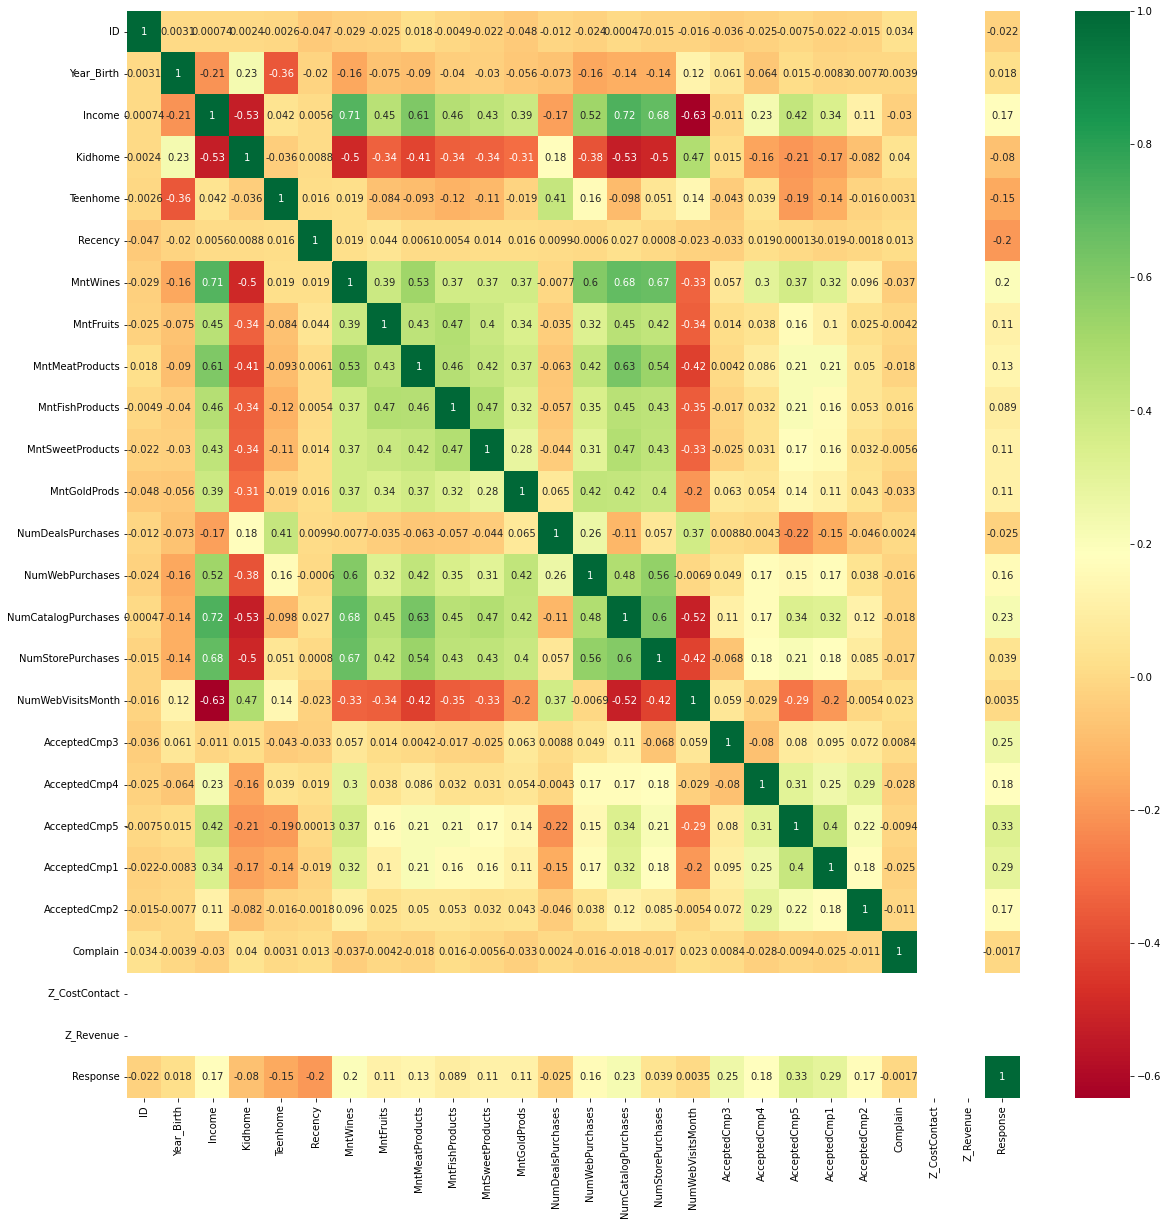

In [8]:
#Diagrama de correlacion completo
plt.figure(figsize=(20,20))
ax = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

Las variables que utilizaremos seran las que tengan una correlacion mayor o igual a 0.4 con respecto a la variable target (NumCatalogPurchases), estas son:
+ Income
+ MntWines
+ MntFruits
+ MntMeatProducts
+ MntFishProducts
+ MntSweetProducts
+ NumWebPurchases
+ NumStorePurchases
+ Kidhome
+ MntGoldProds
+ NumWebVisitsMonth
  
Estas variables seran nuestras variables predictoras

##### **Catálogo:** Modelo

In [205]:
predictors_catalog =["Income","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","NumWebPurchases","NumStorePurchases", "Kidhome", "MntGoldProds", "NumWebVisitsMonth"]
df_x_catalog = df[predictors_catalog]
df_y_catalog = df["NumCatalogPurchases"]

In [202]:
lineal_regresion_catalog, x_train_catalog, x_test_catalog, y_train_catalog, y_test_catalog = train_regresion(df_x_catalog, df_y_catalog)

MODELO ENTRENADO
intercept [w0]= 0.723188211270767
slope [w1]= [ 2.91680767  2.69789997  0.15340515  2.02080493  0.2000452   1.07604216
  0.66063273 -0.33977756 -0.71777811  0.76861755 -2.18035793]


##### **Catalogo:** Evaluación

In [203]:
evaluate_training_data(lineal_regresion_catalog, x_train_catalog, y_train_catalog)

In [204]:
evaluate_test_data(lineal_regresion_catalog, x_test_catalog,y_test_catalog)

De las anteriores gráficas podemos observar un comportamiento anormal, este es debido a que nuestra variable target tiene un rango muy pequeño de valores posibles por tal motivo la gráfica toma estos patrones. Por otro lado podemos observar el valor que nos da el $R^2$, el valor que tomo tanto en el conjunto de entrenamiento (0.6477) como en el de prueba (0.6780) no es el mas óptimo debido a que son valores no tan cercanos a nuestro maximo valore el cual es el 1, pero a pesar de esto es un valor aceptable. Finalmente tenemos el MSE y el RMSE los cuales tomaron los valores de:  
+ $Entrenamiento$
    + $MSE = 2.3941$ 
    + $RMSE = 1.5473$
+ $Prueba$
    + $MSE = 2.3749$
    + $RMSE = 1.5411$  
  
Los anteriores valores son valores pequeños cercanos al 0, no muy grandes lo cual es un indicador positivo y nos muestra que el modelo puede ser bueno a la hora de predecir.

#### Compras por pagina web

##### **Pagina web:** Analisis exploratorio

Al igual que en el modelo anterior usaremos la matriz de correlación para determinar las variables que tienen mas correlacion con la variable target

In [ ]:
#Diagrama de correlacion completo
plt.figure(figsize=(20,20))
ax = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

Las variables que utilizaremos seran las que tengan una correlacion mayor o igual a 0.30 con respecto a la variable target (NumCatalogPurchases), estas son:
+ Income
+ MntWines
+ MntMeatProducts
+ MntFruits
+ MntFishProducts
+ MntSweetProducts
+ MntGoldProds
+ NumCatalogPurchases
+ NumStorePurchases
+ Kidhome

Estas variables seran nuestras variables predictoras

##### **Pagina web:** Modelo

In [ ]:
predictors_web_page =["Income","MntWines","MntMeatProducts","MntGoldProds","NumCatalogPurchases","NumStorePurchases","MntFruits","MntFishProducts","MntSweetProducts","Kidhome"]
df_x_web_page = df[predictors_web_page]
df_y_web_page = df["NumWebPurchases"]

In [ ]:
df_x_web_page.head()

In [ ]:
lineal_regresion_web_page, x_train_web_page, x_test_web_page, y_train_web_page, y_test_web_page = train_regresion(df_x_web_page, df_y_web_page)

##### **Pagina web:** Evaluación

In [ ]:
evaluate_training_data(lineal_regresion_web_page, x_train_web_page, y_train_web_page)

In [ ]:
evaluate_test_data(lineal_regresion_web_page, x_test_web_page,y_test_web_page)

Al igual que en el anterior modelo al observar ambas gráficas de los residuos podemos observar un patrón similar, esto se da por el mismo motivo de  que los valores que posee la variable predictora están en un rango muy pequeño. Por otro lado al observar el $R^2$ si tenemos un resultado peor, debido a que los valores que toma para el conjunto de entrenamiento (0.4389) y para el conjunto de prueba (0.4187) están por debajo de la mitad del valor máximo posible, esto nos indica que el modelo no tiene un ajuste tan bueno. Finalmente tenemos los valores del RMSE y el MSE, los cuales son:
+ $Entrenamiento$
    + $MSE = 3.9032$ 
    + $RMSE = 1.9757$
+ $Prueba$
    + $MSE = 3.8529$
    + $RMSE = 1.9629$  
  
Los anteriores valores son valores un poco más elevados a los obtenidos en el primer modelo, algo que nos indica que este segundo modelo no es tan preciso como el primero


#### Compras por tienda fisica

##### **Tienda fisica:** Analisis exploratorio

Como lo hemos venido haciendo anteriormente usaremos nuevamente la matriz de correlación para determinar las variables mas correlacionadas con la variable target

In [ ]:
#Diagrama de correlacion completo
plt.figure(figsize=(20,20))
ax = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

Las variables que utilizaremos seran las que tengan una correlacion mayor o igual a 0.4 con respecto a la variable target (NumCatalogPurchases), estas son:
+ Income
+ Kidhome
+ MntWines
+ MntFruits
+ MntMeatProducts
+ MntFishProducts
+ MntSweetProducts
+ MntGoldProds
+ NumWebPurchases
+ NumCatalogPurchases
+ NumWebVisitsMonth

Estas variables seran nuestras variables predictoras

##### **Tienda fisica:** Modelo

In [ ]:
predictors_store =["Income","Kidhome","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumWebPurchases","NumCatalogPurchases","NumWebVisitsMonth"]
df_x_store = df[predictors_store]
df_y_store = df["NumStorePurchases"]

In [ ]:
lineal_regresion_store, x_train_store, x_test_store, y_train_store, y_test_store = train_regresion(df_x_store, df_y_store)

##### **Tienda fisica:** Evaluación

In [ ]:
evaluate_training_data(lineal_regresion_store, x_train_store, y_train_store)

In [ ]:
evaluate_test_data(lineal_regresion_store, x_test_store,y_test_store)

En nuestro ultimo modelo de igual forma que en los dos primeros podemos observar el patron anormal, se da por el mismo motivo que en los dos primeros modelos. En segundo lugar al ver el valor del $R^2$ que toma los datos de entrenamiento y los datos de prueba no son tan buenos como lo deseariamos, obteniendo una falta de ajuste en el modelo.Finalmente tenemos los valores de los MSE y del RMSE los cuales son:  
+ $Entrenamiento$
    + $MSE = 4.2687$ 
    + $RMSE = 2.0661$
+ $Prueba$
    + $MSE = 4.6160$
    + $RMSE = 2.1485$  

Los valores obtenidos para este ultimo modelo en cuanto a las metricas mencionadas, son los peores de los 3 modelos debido a que son los de valor mas elevado lo cual nos indica que este modelo es el menos preciso de los 3 y el error que se produce a la hora de intetar predecir un resultado es mayor.

#### Resultados

Finalmente al haber implementado los anteriores modelos podemos darnos cuenta de que a pesar que no son los peores, podriamos intentar mejorarlos un poco mas, obteniendo datos mas pertinentes para el entrenamiento de los modelos, debido a que no son los mas precisos, mas sin embargo si podrian llegar a ser implementados.